# Upper Confidence Bound (UCB)

For algo functioning & steps , Visit pdf

Ads dataset is provided , we need to find the best ads that engages user & will eventually use it for business profit boosting.


n= 1 if clicked , 0 - not clicked

Total 10 ads dataset showed to 10,000 users provided by the company , based on them provide which one will be most useful by using UpperConfidenceBound Algo on it & predicting optimal ad.

This dataset is just a simulation as we don't have any method to track an single user based on ads they click.

We can use naive also for predicting max clicked ad , but ad running campaign bids are too expensive, so only one round of ad popup on user webpage can be afforded.

Upper Confidence bound is Used in ad selection in Digital Marketing.

Each ad have a fixed Conversion Rate : Displayed to click ration /conversion .

Ni(n) = 1000 = no of times ad i has been selected upto round n = no of times it displayed to user = displayed to 1000 users

Ri(n) = Sum of Rewards of each ad upto ith stored

D = Total no of ads = 10

## Importing the libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math     #For sqrt , log , division functions

## Importing the dataset

In [10]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [11]:
#1st loop iterates row-wise from 0 to 10,000 user feedback  user 1 ,2, 3...
#2nd loop from column wise , within each ads columnwise , ad 1 ,2 ,3..

N = 10000    #No of users feedback
d = 10
ads_selected = []        #Final selected optimal ad will be stored here in this list
numbers_of_selections = [0] * d     #Initially it've 10 0's in list , each time an optimal ad is selected that zero is replaced by one.
sums_of_rewards = [0] * d          #Sum of all opted rewards saved here in this list
total_reward = 0       #No of rewards/ads selected

#now using for loop ,We'll go to each users feedback towards ad =10000 & will opt an ad and add to lists , with higher upper confidence bound.

for n in range(0, N):       #entering into each row ad wise
  ad = 0                     #starting from 0th ad & then iteratr through each 10 ads by calculating upper confidence bound
  max_upper_bound = 0   # Variable storing value of Max upper bound value as we iterate through each ad
  for i in range(0, d):    #Changing columns from ad 1st to 2nd & so on .....
    if (numbers_of_selections[i] > 0):    #We need to have atleast ad selected even once from all ads
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]   # Average of ith ad calculated = sum of ith ad occured / no of times ith ad selected
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])  #IMP - Confidence interval = delta_i for ith ad chosen calculated
      upper_bound = average_reward + delta_i   #Upper bound value is obtained by average of ith ad selected + confidence value , n+1 as index from 0
    else:    #need to opt ads not selected in loop will have max upper confidence bound = eˆ400
      upper_bound = 1e400     #while no of selection <=0 , no ads selected in that case upper_bound
    if (upper_bound > max_upper_bound):   #Max_upper_bound is zero initially , but as round loops it gets updated & comparison takes place
      max_upper_bound = upper_bound
      ad = i     #Ad with max upper bound opted is ith ad , index of ad is then added to variable
  ads_selected.append(ad)    #Selected ads will be added to ads_selected list created iniially
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1     #No of times ad ith selected will be incremented by 1 instead of 0 based on index of ad i
  reward = dataset.values[n, ad]    #For each ad clicked = reward , accessing via row = n & ad no = ad
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward    # adding that value selected to this list then for ad selected
  total_reward = total_reward + reward #ad selected & shown to user will be added in this list


  #ads_selected is list that contains 10,000 entrys for ads selected at each round of loop ends - max ad selected each time - optimal one .


## Visualising the results

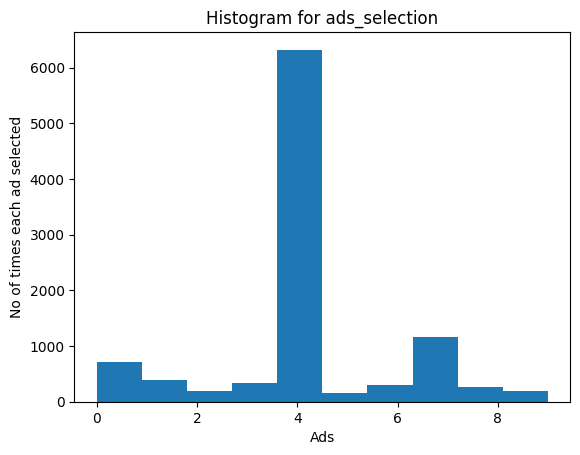

In [12]:
plt.hist(ads_selected)     #Hist keyword is used to plot histogram in the python
plt.title('Histogram for ads_selection')
plt.xlabel('Ads')
plt.ylabel('No of times each ad selected')
plt.show()

#ad 4 is optimal as most clicked
#Accuracy increases as more no of rounds increase = 10k , 20k , 5k etc
#min 500 rounds required by UCB to get optimal ad